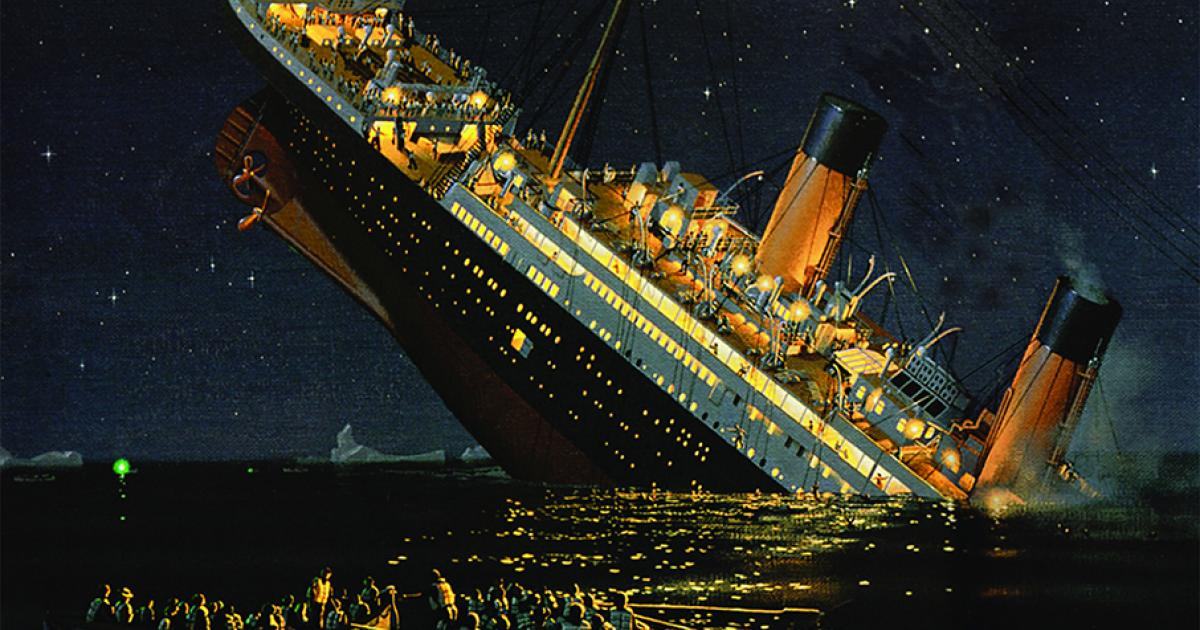

# **OBJECTIVE OF THE STUDY:**

Build a model to predict whether a passenger survived or not

**IMPORTING LIBRARIES**

In [473]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [474]:
df=pd.read_csv('/content/drive/MyDrive/INTERSHIPS/CODSOFT/TITATIC SURVIVAL PREDICTION/Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## **Attribute Information**
* PassengerId - ID of the passeneger  
* Survived - Survival (0 = No; 1 = Yes)   
* Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)   
* Name - Name of the passenger   
* Sex - Sex of the passenger(male,female)  
* Age - Age of the passenger  
* Sibsp - Number of Siblings/Spouses Aboard
* Parch - Number of Parents/Children Aboard
* Ticket - Ticket Number
* Fare - Passenger Fare
* Cabin - Cabin
* Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


## **DATA PREPROCESSING**

In [475]:
 #To print last 5 rows using head function
 df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [476]:
#To print first 5 rows using tail function
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [477]:
#check the descriptive statistics of numeric variables
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [478]:
#view the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [479]:
#view the shape of dataset
df.shape

(891, 12)

In [480]:
#checking duplicate values
df=df.drop_duplicates()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [481]:
features=['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
for i in features:
  print(df[i].unique(),i)
  print('----------------')

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

In [482]:
#checking the null values
df.isna().any()

,0
PassengerId,False
Survived,False
Pclass,False
Name,False
Sex,False
Age,True
SibSp,False
Parch,False
Ticket,False
Fare,False


In [483]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


* Imputing the missing values with mean for the columns 'Age' and 'Embarked'.  
* Droped the column 'Cabin' which contains more missing values.

In [484]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


<ipython-input-484-ea43ea6d3abd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)
<ipython-input-484-ea43ea6d3abd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [485]:
#drop the coloumns which are not necesssary
df.drop(['Ticket', 'Cabin', 'Name', 'PassengerId'], axis=1, inplace=True)

In [486]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [487]:
df.isna().any()

,0
Survived,False
Pclass,False
Sex,False
Age,False
SibSp,False
Parch,False
Fare,False
Embarked,False


## **DATA VISUALIZATION**

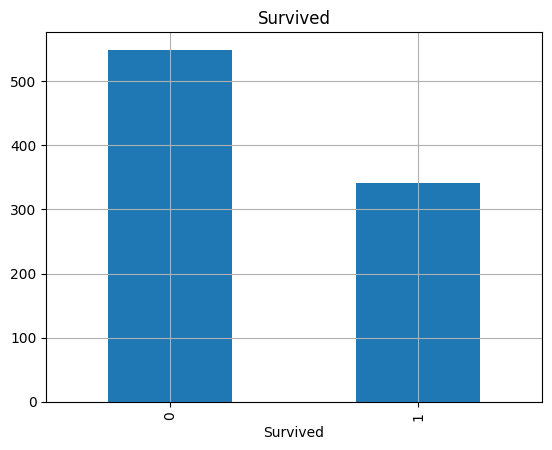

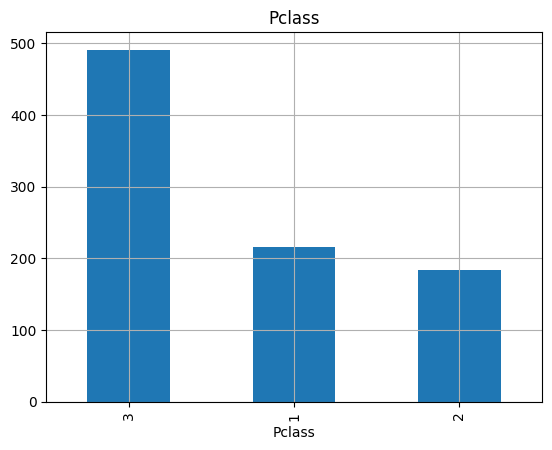

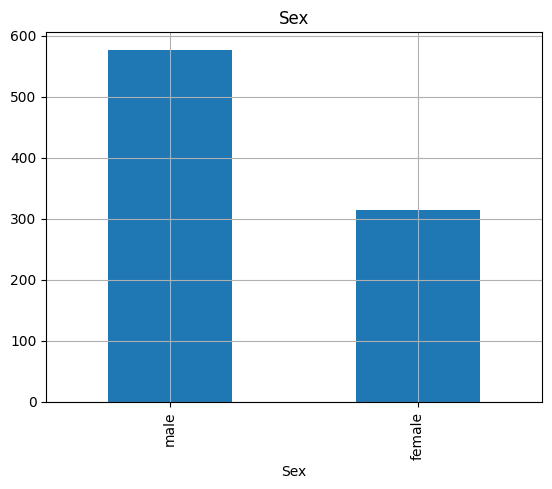

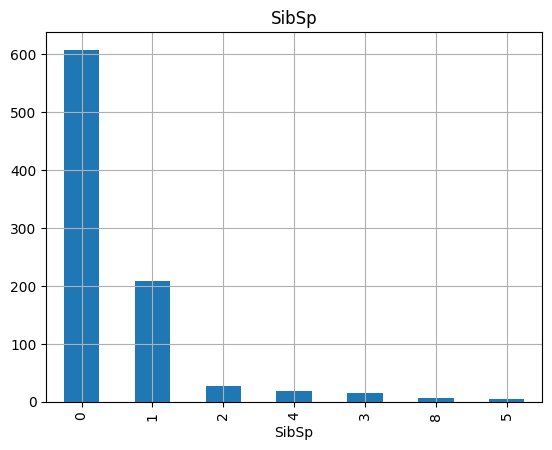

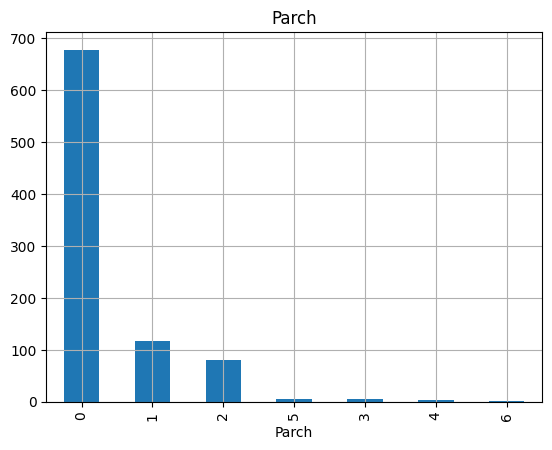

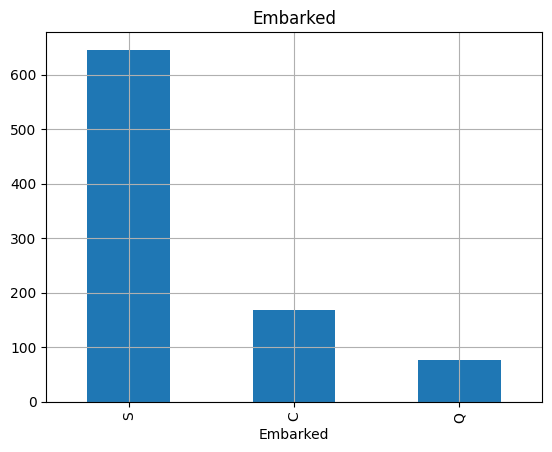

In [488]:
features=['Survived','Pclass','Sex','SibSp','Parch','Embarked']
for f in features:
  df[f].value_counts().plot(kind='bar')
  plt.title(f)
  plt.grid()
  plt.show()

<Axes: xlabel='Age', ylabel='Density'>

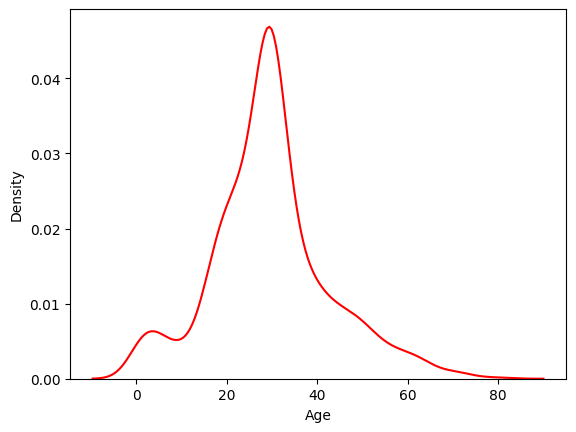

In [489]:
sns.kdeplot(df["Age"],color = 'red')

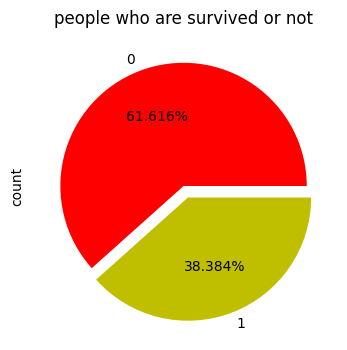

In [490]:
plt.figure(figsize=(4,4))
labels = ['0','1']
df["Survived"].value_counts().plot(kind='pie',labels = labels,autopct='%1.3f%%',colors=['r','y'],explode=(0,.1))
labels = ['0','1']
plt.title("people who are survived or not")
plt.show()


In [491]:
numerical_features = df.select_dtypes(include=['number']).columns
cor_mtx = df[numerical_features].corr()['Survived']

cor_mtx

,Survived
Survived,1.000000
Pclass,-0.338481
Age,-0.069809
SibSp,-0.035322
Parch,0.081629
Fare,0.257307


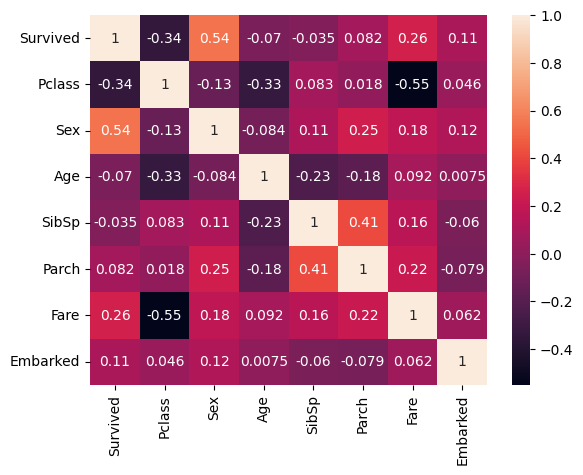

In [492]:
# Convert 'Sex' and 'Embarked' columns to numerical representations
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})  # Map 'male' to 0 and 'female' to 1
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}) # Map 'S' to 0, 'C' to 1 and 'Q' to 2

# Assuming df is your DataFrame
sns.heatmap(df.corr(), annot=True)
plt.show()

**Encoding categorical variables into numerical format**

In [493]:
#convert categorical variables into numerical format
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list=['Sex','Embarked']
for i in list:
  df[i]=le.fit_transform(df[i])
  df

In [494]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [495]:
df['Age']=df['Age'].astype(int)

In [496]:
df.dtypes

,0
Survived,int64
Pclass,int64
Sex,int64
Age,int64
SibSp,int64
Parch,int64
Fare,float64
Embarked,int64


**split the data frame into x and y**

In [497]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [498]:
 #predictors
 x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22,1,0,7.2500,0
1,1,1,38,1,0,71.2833,1
2,3,1,26,0,0,7.9250,0
3,1,1,35,1,0,53.1000,0
4,3,0,35,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27,0,0,13.0000,0
887,1,1,19,0,0,30.0000,0
888,3,1,29,1,2,23.4500,0
889,1,0,26,0,0,30.0000,1


In [499]:
x.shape

(891, 7)

In [500]:
#target
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


**Train Test Split**

In [501]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [502]:
x_train.shape,y_train.shape

((712, 7), (712,))

In [503]:
x_test.shape,y_test.shape

((179, 7), (179,))

**STANDARDIZATION**

In [504]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [505]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


## **MODEL CREATION**

**1)K-NEAREST NEIGHBOR(KNN)**

In [506]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

y_pred1=knn_model.predict(x_test)
y_pred1

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0])

[[101  13]
 [ 14  51]]


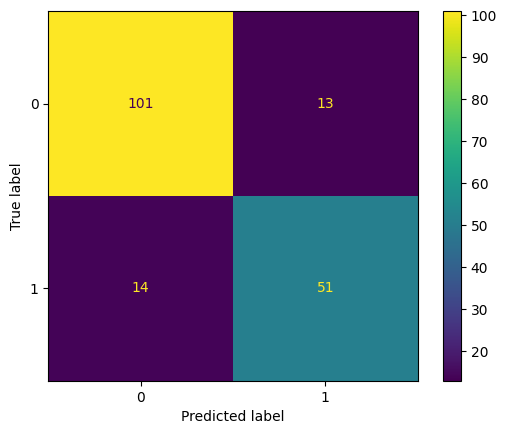

In [507]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result = confusion_matrix(y_test,y_pred1)
print(result)
labels=[0,1]
cmd = ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()

In [508]:
#Accuracy Score and classification report
from sklearn.metrics import accuracy_score,classification_report

a=accuracy_score(y_test,y_pred1)
print('Accuracy: ',a*100,'\n')
print(classification_report(y_test,y_pred1))

Accuracy:  84.91620111731844 

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       114
           1       0.80      0.78      0.79        65

    accuracy                           0.85       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



In [509]:
training_score = knn_model.score(x_train,y_train)
training_score

0.8581460674157303

In [510]:
testing_score =knn_model.score(x_train,y_train)
testing_score

0.8581460674157303

**2)SUPPORT VECTOR MACHINE(SVM)**

In [511]:
from sklearn.svm import SVC
sv_model=SVC()
sv_model.fit(x_train,y_train)
y_pred2=sv_model.predict(x_test)
y_pred2

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0])

[[105   9]
 [ 17  48]]


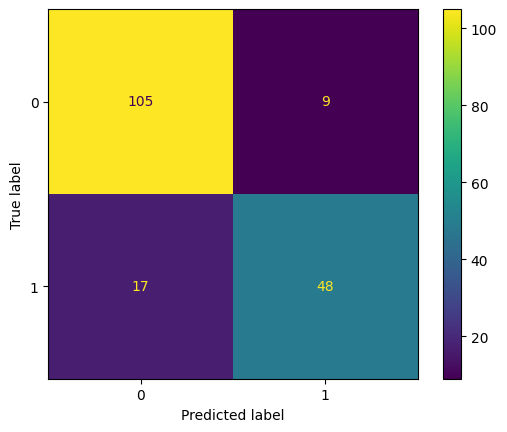

In [512]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result = confusion_matrix(y_test,y_pred2)
print(result)
labels=[0,1]
cmd = ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()

In [513]:
#Accuracy Score and classification report
from sklearn.metrics import accuracy_score,classification_report

b=accuracy_score(y_test,y_pred2)
print('Accuracy: ',b*100,'\n')
print(classification_report(y_test,y_pred2))

Accuracy:  85.47486033519553 

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       114
           1       0.84      0.74      0.79        65

    accuracy                           0.85       179
   macro avg       0.85      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179



In [514]:
training_score = sv_model.score(x_train,y_train)
training_score

0.8342696629213483

In [515]:
testing_score = sv_model.score(x_train,y_train)
testing_score

0.8342696629213483

**LOGISTIC REGRESSION**

In [516]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
y_pred3 = lr_model.predict(x_test)
y_pred3

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0])

[[94 20]
 [13 52]]


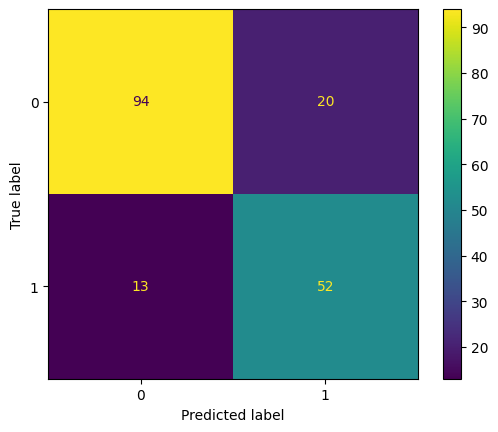

In [517]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result=confusion_matrix(y_test,y_pred3)
print(result)
labels=[0,1]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()

In [518]:
#Accuracy Score and classification report
from sklearn.metrics import accuracy_score,classification_report

c=accuracy_score(y_test,y_pred3)
print('Accuracy: ',c*100,'\n')
print(classification_report(y_test,y_pred3))

Accuracy:  81.56424581005587 

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       114
           1       0.72      0.80      0.76        65

    accuracy                           0.82       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.82      0.82      0.82       179



In [519]:
training_score = lr_model.score(x_train,y_train)
training_score

0.7921348314606742

In [520]:
testing_score = lr_model.score(x_train,y_train)
testing_score

0.7921348314606742

**OBSERVATION:**   
Here 'SUPPORT VECTOR MACHINE(SVM)' have highest accuracy.So we choose it is the best model.

## **PREDICTION**

In [521]:
lr_model.predict([[4,1,44.6,0,0,7.9397,3]])

array([0])

## **CONCLUSION**  

Based on the performance evaluation, the Support Vector Machine (SVM) achieved the highest accuracy. Its F1 score and recall were also strong, indicating balanced and reliable predictions. Therefore, Support Vector Machine (SVM) can be considered the most effective model for this task.